# Homework: Construct a network for XOR

In [1]:
from activationfuncs import jump, linear, sigmoid
from neuralnet import Layer, NeuralNet, visualize_2to1_network

In [4]:
xor_2hl_network = NeuralNet(
    # fmt: off
    #
    # first hidden layer: binary activation to 1.0 iff
    # * y_1 > 0 (node 1),
    # * y_1 < 0 (node 2),
    # * y_2 > 0 (node 3),
    # * y_2 < 0 (node 4),
    Layer(
        W=[
            [ 1,  0],
            [-1,  0],
            [ 0,  1],
            [ 0, -1],
        ],
        b=0,
        f=jump,
    ),
    #
    #
    # second hidden layer: logical "and" of input conditions:
    # * y_1 > 0 and y_2 < 0 (node 1)
    # * y_1 < 0 and y_2 > 0 (node 2)
    #
    # The logical "and" works this this: without bias and jump-activation, we
    # have
    # * (0, 0) -> 0,
    # * (0, 1) -> 0.5,
    # * (1, 1) -> 0.5,
    # * (1, 1) -> 1.0
    # shifting down by 0.75 and using jump activation selects (1, 1)
    Layer(
        W=[
            [0.5, 0  , 0  , 0.5],
            [0  , 0.5, 0.5, 0  ],
        ],
        b=-0.75,
        f=jump,
    ),
    #
    #
    # output layer: logical "or" (superposition of inputs)
    Layer(W=[[1, 1]], b=0, f=linear,),
    # fmt: on
)

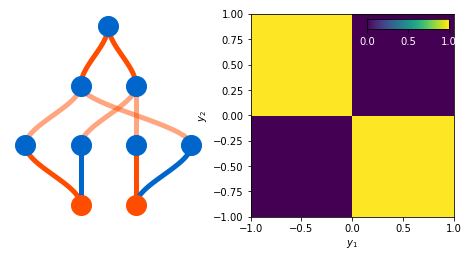

In [3]:
visualize_2to1_network(xor_2hl_network)